In [1]:
from bs4 import BeautifulSoup

import requests

In [2]:
url = 'https://coinmarketcap.com/currencies/ethereum/'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1708002842657;return;}window.__renderTime__ = {"pageInitStart":1708002842495,"pageInitEnd":1708002842651,"pageRender":1708002842657};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) r
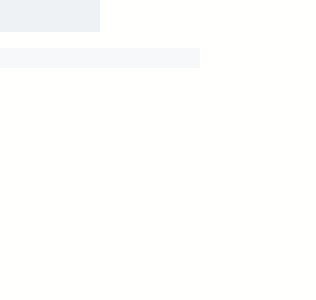

In [3]:
print(soup)

In [ ]:
# to insert the crypto name

# we have the span tag and for the attribute we have the class

In [4]:
soup.find('span', class_ ='sc-f70bb44c-0 jltoa')

<span class="sc-f70bb44c-0 jltoa" data-role="coin-name" title="Ethereum">Ethereum<span class="sc-f70bb44c-0 iQEJet coin-name-mobile"> price</span> </span>

In [5]:
soup.find('span', class_ ='sc-f70bb44c-0 jltoa').text

'Ethereum price\xa0'

In [6]:
crypto_name = soup.find('span', class_ ='sc-f70bb44c-0 jltoa').text

print(crypto_name)

Ethereum price 


In [ ]:
# removing the word 'price'

In [7]:
final_crypto_name = crypto_name.replace('price', '')

print(final_crypto_name)

Ethereum  


In [ ]:
# to insert the price 

In [8]:
soup.find('span', class_ ='sc-f70bb44c-0 jxpCgO base-text')

<span class="sc-f70bb44c-0 jxpCgO base-text">$2,797.74</span>

In [9]:
soup.find('span', class_ ='sc-f70bb44c-0 jxpCgO base-text').text

'$2,797.74'

In [ ]:
# getiing rid of the $ sign 

In [10]:
crypto_price = soup.find('span', class_ ='sc-f70bb44c-0 jxpCgO base-text').text

In [11]:
final_price = crypto_price.replace('$', '') 

final_price

'2,797.74'

In [ ]:
# setting up the df 


In [12]:
import pandas as pd

In [ ]:
# next we also need to import the date and time of each price

In [13]:
from datetime import datetime

date_time = datetime.now()

print(date_time)


2024-02-15 14:17:03.125170


In [ ]:
### the dict needs to have an index 

In [15]:
date_time = datetime.now()

dict = {
    'Crypto Name': final_crypto_name, 
    'Price': final_price,
    'TimeStamp': date_time
}

df = pd.DataFrame(dict, index = [0])

df

,Crypto Name,Price,TimeStamp
0,Ethereum,"2,797.74",2024-02-15 14:17:43.296015


In [ ]:
# putting in csv 

In [35]:
df.to_csv(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv')

In [ ]:
# appeninding new data without overwriting into the file

In [37]:
import os

In [43]:
if os.path.exists(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv'):
    df.to_csv(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv', mode ='a', header = False, index = False)
else: 
    df.to_csv(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv')    
    

# Putting ALL TOGETHER 

In [1]:
from bs4 import BeautifulSoup

import requests

import pandas as pd

from datetime import datetime

import os 

import time





In [2]:

def automated_crypto_pull():

    url = 'https://coinmarketcap.com/currencies/ethereum/'

    page = requests.get(url)

    soup = BeautifulSoup(page.text, 'html')

    crypto_name = soup.find('span', class_ ='sc-f70bb44c-0 jltoa').text
    
    final_crypto_name = crypto_name.replace('price', '')

    crypto_price = soup.find('span', class_ ='sc-f70bb44c-0 jxpCgO base-text').text

    final_price = crypto_price.replace('$', '') 


    date_time = datetime.now()

    dict = {
        'Crypto Name': final_crypto_name, 
        'Price': final_price,
        'TimeStamp': date_time
    }

    df = pd.DataFrame(dict, index = [0])

    if os.path.exists(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv'):
        df.to_csv(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv', mode ='a', header = False, index = False)
    else: 
        df.to_csv(r'C:\Users\Mar\Documents\Data Analytics\Python\Python Courses\Crypto Web Puller\Crypto_Automated_Pull.csv', index = False)  
    
    print(df)    



In [ ]:
## the automation comes now at the end 

In [ ]:

while True:
    automated_crypto_pull()

    time.sleep(3600)

  Crypto Name     Price                  TimeStamp
0  Ethereum    2,840.37 2024-02-16 13:42:35.517936
